### Loading the Dataset

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('titanic.csv')

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The Titanic dataset has been loaded. It contains columns such as `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.

# 1. Handling Missing Data

In [81]:
# check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**the missing data(Age) = 20%**
- so can't risk losing all of the data
- Since it’s numerical, you could replace missing values with the median age to avoid skewing the distribution.

In [83]:
df['Age'] = df['Age'].fillna(df['Age'].median())

**the missing data(Cabin) = 77%**
- so can't fill the lose all of the data by predict

In [84]:
df.drop(columns=['Cabin'], inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


**Embarked:**

- Since it’s categorical and only has 2  missing values, you can fill in the mode (most common embarkation point).

In [85]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\heba.raslan\AppData\Local\Temp\ipykernel_21128\2531022806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

# 2.	Handling Duplicates

**`df.duplicated().sum()` returning `0`:**
- This command checks for duplicate rows across all columns in the DataFrame.
- If it returns `0`, it means that there are no complete duplicate rows in the DataFrame, where all columns have the same values.

In [87]:
df.duplicated().sum()

0

In [88]:
# Drop duplicates if found
# df.drop_duplicates(inplace=True)

**`df.duplicated(subset=['Parch']).sum()` returning `884`:**
- This command checks for duplicates only based on the `Parch` column.
- The result of `884` indicates that there are `884` instances where the value of `Parch` is repeated in different rows.
- It's important to note that these are not complete duplicates (where every column matches), but rather that many rows share the same value for `Parch`.

In [89]:
df.duplicated(subset=['Parch']).sum()

884

In [90]:
df.shape

(891, 11)

In [91]:
print(df['Parch'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


### Bins or Feature Engineering

In [92]:
###################################

# 3.	Handling Incorrect Data Types

In [93]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

**`object`:** Typically used for string values or mixed types

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     0 non-null      object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None


- **String Conversion:** Converting `PassengerId` and `Ticket` to string makes it clear these columns aren’t for mathematical operations.

In [96]:
df['PassengerId'] = df['PassengerId'].astype(str)
df['Ticket'] = df['Ticket'].astype(str)

- **Category Conversion:** Converting `Pclass`, `Sex`, and `Embarked` to category reduces memory usage and prepares them for encoding steps later, making operations like grouping and aggregating more efficient.

In [97]:
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [98]:
print(df.dtypes)

PassengerId      object
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object


In [99]:
print("Columns in the DataFrame before encoding:", df.columns)

Columns in the DataFrame before encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [100]:
# One-hot encoding for categorical columns like Sex and Embarked
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
print("Columns in the DataFrame after encoding:", df.columns)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Label encoding for Pclass (only if ordinal relationship is assumed)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

Columns in the DataFrame after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Sex_male'],
      dtype='object')


In [101]:
print("Columns in the DataFrame after encoding:", df.columns)

Columns in the DataFrame after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male'],
      dtype='object')


For a column Pclass with values `[1, 2, 3]`, **Label Encoding** would produce:

**Pclass**

`   0        # Category 1`

`   1        # Category 2`
   
`   2        # Category 3`


**Summary**

While category is primarily for efficient data handling and memory saving during the preprocessing phase, encoding these categorical columns to numerical formats is the final step before model training.

# 4.	Outliers

### 4.1 Identifying Outliers

### 4.1.1 Statistical Methods

**Z Score**

- A Z-score measures how many standard deviations a data point is from the mean. 
- Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
- While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.
- A common threshold for identifying outliers is a Z-score greater than 3 or less than -3.

<img src='zscore.jpeg'>

- The absolute Z-score `(np.abs(...))` is taken to ensure that both extreme low and high values are considered.

In [102]:
import numpy as np

def detect_outliers(column_name):
    mean_col = np.mean(df[column_name])
    std_dev_col = np.std(df[column_name])
    z_scores_col = (df[column_name] - mean_col) / std_dev_col
    outliers_col = df[column_name][np.abs(z_scores_col) > 3]  # Identify outliers
    
    # Calculate the number of outliers and the total rows in the dataset
    num_outliers = outliers_col.shape[0]
    total_rows = df.shape[0]
    
    print(f"Outliers in '{column_name}' using Z-score:\n", outliers_col)
    print(f"\nNumber of outliers in '{column_name}': {num_outliers} out of {total_rows} rows")

### Select numeric columns to calculate Z-scores (`Age`, `Fare`, `SibSp`, `Parch`)

In [103]:
detect_outliers('Age')

Outliers in 'Age' using Z-score:
 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

Number of outliers in 'Age': 7 out of 891 rows


- The rows shown, such as `96`, `116`, and so on, represent the indices in the DataFrame where `Age` values were detected as outliers.
- The values following each index, like `71.0` and `80.0`, are the actual ages that were identified as outliers.

In [104]:
# detect_outliers('Fare')

In [105]:
# detect_outliers('SibSp')

In [106]:
# detect_outliers('Parch')

**IQR (Interquartile Range)**
- It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1).
- Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

<img src='boxplot.png'>

1. **Calculate the IQR:** The IQR is defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.
2. **Define the outlier bounds:** Any data point below 
𝑄1−1.5×IQR or above 𝑄3+1.5×IQR is considered an outlier.
3. Count the number of outliers and compare them to the total number of rows.

In [107]:
def detect_outliers_iqr(column_name):
    Q1 = np.percentile(df[column_name].dropna(), 25)
    Q3 = np.percentile(df[column_name].dropna(), 75)
    IQR = Q3 - Q1  # Calculate IQR
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers_col = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    # Calculate the number of outliers and the total rows in the dataset
    num_outliers = outliers_col.shape[0]
    total_rows = df.shape[0]
    
    print(f"Outliers in '{column_name}' using IQR:\n", outliers_col)
    print(f"\nNumber of outliers in '{column_name}': {num_outliers} out of {total_rows} rows")
    
    return lower_bound, upper_bound

In [108]:
detect_outliers_iqr('Age')

Outliers in 'Age' using IQR:
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64

Number of outliers in 'Age': 66 out of 891 rows


(2.5, 54.5)

In [109]:
# detect_outliers_iqr('Fare')

In [110]:
# detect_outliers_iqr('SibSp')

In [111]:
# detect_outliers_iqr('Parch')

**Skewness**
- the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [112]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())
print('skewness value of Age: ',df['SibSp'].skew())
print('skewness value of Fare: ',df['Parch'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893
skewness value of Age:  3.6953517271630565
skewness value of Fare:  2.7491170471010933


- **Interpretation:** A skewness value of about `4.79` suggests a significant positive skew. This means that most passengers paid lower fares, with a few passengers having very high fares creating a long right tail. The distribution is highly asymmetric, indicating that a small number of high fare values heavily influence the average fare.

### 4.1.2 Visualization Methods (Box Plot)
<img src='boxplot.png'>

Box plots are typically used for **numeric columns** to show the distribution of data, identify outliers, and understand the central tendency.

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# sns.boxplot(df['Age'])

<Axes: ylabel='Fare'>

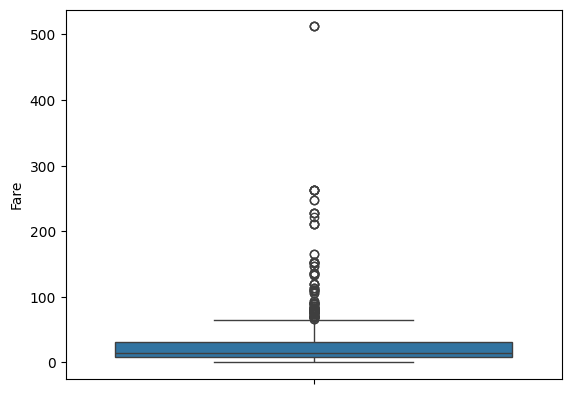

In [115]:
sns.boxplot(df['Fare'])

In [116]:
# sns.boxplot(df['SibSp'])

In [117]:
# sns.boxplot(df['Parch'])

### 4.2 Handle it

### 4.2.1 Flooring and Capping

Replace outliers with the maximum or minimum values within the range.

**Example:**

Suppose we have an "Age" column with outliers below 10 and above 80. After detecting that 10 and 80 are our lower and upper bounds:

- Flooring will replace all values below 10 with 10.
- Capping will replace all values above 80 with 80.

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [118]:
def floor_and_cap(column_name):
    lower_bound, upper_bound = detect_outliers_iqr(column_name)  # Get bounds from IQR function
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    print(f"Applied flooring and capping to '{column_name}' based on IQR limits.")

In [119]:
# floor_and_cap('Age')

In [120]:
# floor_and_cap('Fare')

In [121]:
# the boxplot below shows no presence of outliers
# sns.boxplot(df['Fare'])

### 4.2.2 Trimming (also called truncation)

 Remove extreme values entirely from the dataset.

 **When to Use Trimming?**
 
Trimming is useful when:

- You have a large dataset where removing a small percentage of data won’t affect the overall analysis.
- You want to simplify the data distribution for models that are sensitive to outliers, such as linear regression.

In [122]:
def trim_outliers(column_name):
    lower_bound, upper_bound = detect_outliers_iqr(column_name)  # Get bounds from IQR function
    # Print initial dimensions
    initial_shape = df.shape
    print(f"\nOriginal dataset shape: {initial_shape[0]} rows, {initial_shape[1]} columns")
    
    # Keep only rows within the bounds
    trimmed_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    # Print dimensions after trimming
    trimmed_shape = trimmed_df.shape
    print(f"Dataset shape after trimming outliers in '{column_name}': {trimmed_shape[0]} rows, {trimmed_shape[1]} columns")
    
    return trimmed_df

In [123]:
# trimmed_df_age = trim_outliers('Age')

### 4.2.3 Replacing outliers with the mean, median, mode, or other values
1. **Replacing with the Mean:** 

    - if the data is approximately normally distributed, without strong skewness.
2. **Replacing with the Median:** 

    - if the data has a strong skew, as it won’t be influenced by extreme values.
    - This method is often preferred for data like income or home prices, where a few extreme values can distort the average.
3. **Replacing with the Mode:**

    - This is best for categorical or discrete data where a common or most frequent value makes sense.
    - Use this for data like `SibSp` (number of siblings/spouses) or other count-based features, where the most frequent count can replace outliers effectively.
4. **Replacing with Other Values:**
    - You can also use custom values depending on the context. For instance, you might set outliers in an age column to a certain threshold, such as 100, for practical reasons.

1. **Replacing Outliers in 'Age' with the Median**

    - Since Age often has missing values and can be skewed (for instance, children and the elderly), using the median provides a robust, outlier-resistant estimate.

In [124]:
# Calculate the median of 'Age'
median_age = df['Age'].median()
age_lower, age_upper = detect_outliers_iqr('Age') 
# Replace outliers in 'Age' with the median
df['Age'] = np.where((df['Age'] < age_lower) | (df['Age'] > age_upper), median_age, df['Age']) 

Outliers in 'Age' using IQR:
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64

Number of outliers in 'Age': 66 out of 891 rows


2. **Replacing Outliers in 'Fare' with the Mean**
    - Fare has a long tail due to high-ticket prices for first-class passengers.
    - However, replacing outliers with the mean makes sense here because we’re not as concerned about the skewness for ticket prices, and the mean value represents an average fare that is useful in calculating overall trends.

In [125]:
# Calculate the mean of 'Fare'
mean_fare = df['Fare'].mean()
fare_lower, fare_upper = detect_outliers_iqr('Fare') 
# Replace outliers in 'Fare' with the mean
df['Fare'] = np.where((df['Fare'] < fare_lower) | (df['Fare'] > fare_upper), mean_fare, df['Fare'])

Outliers in 'Fare' using IQR:
 1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

Number of outliers in 'Fare': 116 out of 891 rows


3. **Replacing Outliers in 'SibSp' and 'Parch' with the Mode**
    - SibSp (number of siblings/spouses) and Parch (number of parents/children) are count-based discrete variables, so using the mode (most common value) is appropriate for replacing outliers.
    - These columns have a natural lower bound (0 family members), so setting outliers to the mode ensures we’re using a logical replacement without adding non-integer or average values to a count field.

In [126]:
# Calculate the mode of 'SibSp' and 'Parch'
mode_sibsp = df['SibSp'].mode()[0]
mode_parch = df['Parch'].mode()[0]

# Replace outliers in 'SibSp' with the mode
df['SibSp'] = np.where((df['SibSp'] < 0) | (df['SibSp'] > 8), mode_sibsp, df['SibSp'])
# Replace outliers in 'Parch' with the mode
df['Parch'] = np.where((df['Parch'] < 0) | (df['Parch'] > 6), mode_parch, df['Parch'])

# 5.	Handling Inconsistent Data # # #

In [127]:
# Check for inconsistencies in 'Pclass', 'Sex', and 'Embarked'
print("Unique values in 'Pclass':", df['Pclass'].unique())
print("Unique values in 'Sex_male':", df['Sex_male'].unique())

Unique values in 'Pclass': [2 0 1]
Unique values in 'Sex_male': [ True False]


# 6.	Feature Scaling and Normalization (New Task)

- Bring all features into a similar range

1. **Standardization (Z-score normalization)**

    - **Purpose:** Centers data around zero with a unit standard deviation, making it suitable for algorithms that assume normally distributed data.
    - **Formula:** `𝑧=(𝑥−mean)/standard deviation`
    - **When to Use:** Suitable for algorithms like linear regression, logistic regression, and K-means clustering, where distances or assumptions of normally distributed data matter.



In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

2. **Min-Max Scaling (Normalization)**

    - **Purpose:** Scales features to a fixed range, typically `[0,1]` or `[-1,1]`, preserving relative relationships.
    - **Formula:** `Xscaled=(X−Xmin)/(Xmax−Xmin)`
    - **When to Use:** Recommended for algorithms like neural networks and K-nearest neighbors (KNN), as they perform better with data within a defined range.

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

3. **Robust Scaling**

    - **Purpose:** Scales features based on median and interquartile range, reducing the impact of outliers.
    - **Formula:** `Xscaled = (X−median)/IQR`
    - **When to Use:** Ideal when your data has many outliers, as it mitigates their influence.


In [130]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

4. **Max Abs Scaling**

    - **Purpose:** Scales data by dividing each feature by its maximum absolute value, preserving the sign of each value.
    - **Formula:** `Xscaled = X / ∣Xmax∣`
    - **When to Use:** Commonly used when the data is already centered at zero and sparse, as it preserves zero entries in the data.

In [131]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

5. **L1 and L2 Normalization**

    - **Purpose:** Scales data based on the sum of absolute values (L1) or sum of squares (L2) for unit length, making vector lengths equal.
    - **Formulas:**
        - L1: `𝑋scaled = 𝑋 / ∑∣𝑋∣`
        - L2: `Xscaled = 𝑋 / √∑X²`
    - **Use Case:** Used in machine learning algorithms that rely on distance metrics, such as K-means clustering or nearest neighbors. L2 is more common than L1.
​



6. **Decimal Scaling**

    - **Purpose:** Moves decimal places to bring values within a certain range.
    - **Formula:** `Xscaled = X / 10^𝑗` where 𝑗 is the smallest integer such that all values fall between -1 and 1.
    - **Use Case:** When you need to scale data quickly and approximately, especially when precise min-max ranges aren’t known. Rarely used in practice.

7. **Log Transformation**

    - **Purpose:** Reduces skewness and stabilizes variance, bringing data closer to a normal distribution.
    - **Formula:** `𝑋transformed = log(𝑋+𝑐)X`  where 𝑐 is a constant to avoid log(0) issues.
    - **Use Case:** Effective for right-skewed data with a wide range of positive values. Often used before machine learning models to make the data more symmetric.

8. **Power Transformation**

    - **Purpose:** Reduces skewness and makes the data more normally distributed.
    - **Formulas:**
        - Box-Cox: For positive data only, 
        
            `𝑋transformed = (𝑋^𝜆 − 1) / 𝜆`  for `𝜆≠0`.
        - Yeo-Johnson: Extends to both positive and negative values.
    - **Use Case:** When data has significant skewness and variance instability. Helps certain algorithms by ensuring the data follows a Gaussian distribution.

| Normalization Technique       | When to Use                                                                                               |
|-------------------------------|-----------------------------------------------------------------------------------------------------------|
| Min-Max Scaling               | When you want to normalize data to a fixed range, typically [0, 1]. Useful for data with varying ranges. |
| Z-score Normalization         | When your data follows a Gaussian distribution. Helps to bring the mean to 0 and standard deviation to 1.|
| Robust Scaling                | Effective for datasets with outliers. Scales data according to the median and the interquartile range.   |
| Max Abs Scaling               | Useful for data already centered at zero and needs to be scaled to the range [-1, 1].                     |
| L1 and L2 Normalization       | Converts features into a unit vector. Commonly used in text classification and clustering.               |
| Decimal Scaling               | Normalizes data based on the number of digits.                                                           |
| Log Transformation            | Effective for positively skewed distributions, helping to reduce skewness.                                |
| Power Transformation          | Useful for transforming non-Gaussian data into a Gaussian-like distribution.                              |


# 7.	Handling Categorical Variables

- Label encoding is used to convert categorical values into numeric ones.
- already done after "3.	Handling Incorrect Data Types"

# 8.	Handling String Data

### 8.1 String Cleaning

- replace any character that is not a word character `(\w)` or whitespace `(\s)` with an empty string. This cleaning helps normalize the names and prepares them for further analysis.

In [132]:
# Removes punctuation
df['Name'] = df['Name'].str.replace(r'[^\w\s]', '')  
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### 8.2 Lowercasing

- eliminate case sensitivity, making it easier to match and analyze names without treating "Smith" and "smith" as different entries.

In [133]:
df['Name'] = df['Name'].str.lower()
df['Name']

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

### 8.3 Tokenization

- The 'Name' column can be split into first and last names or other relevant tokens.
- creates a new column where each name is represented as a list of tokens (words).
- This can be useful for analyzing titles or separating names for feature extraction.

In [134]:
df['Name_Tokens'] = df['Name'].str.split()
df['Name_Tokens']

0                           [braund,, mr., owen, harris]
1      [cumings,, mrs., john, bradley, (florence, bri...
2                             [heikkinen,, miss., laina]
3      [futrelle,, mrs., jacques, heath, (lily, may, ...
4                          [allen,, mr., william, henry]
                             ...                        
886                            [montvila,, rev., juozas]
887                    [graham,, miss., margaret, edith]
888       [johnston,, miss., catherine, helen, "carrie"]
889                           [behr,, mr., karl, howell]
890                              [dooley,, mr., patrick]
Name: Name_Tokens, Length: 891, dtype: object

### 8.4 Removing Titles from Names

- Extract useful information from names that can be treated as features.
-  Titles like "Mr.", "Mrs.", "Miss" provide insight into gender and social status.
- `(\w+)`: This part captures the title.

In [135]:
df['Title'] = df['Name'].str.extract(r', (\w+)\.')
df['Title']

0        mr
1       mrs
2      miss
3       mrs
4        mr
       ... 
886     rev
887    miss
888    miss
889      mr
890      mr
Name: Title, Length: 891, dtype: object

### 8.5 Concatenating Columns

- Combine multiple columns into a single feature for better representation.

In [136]:
df['Title_Name'] = df['Title'] + ' ' + df['Name']


# 9.	Data Binning

- Binning divides continuous numerical data into discrete intervals, making it easier to analyze.

**Types of Binning**

1. **Equal-Width Binning:** Divides the range of data into equal-sized intervals.

In [137]:
df['Age_bin_equal_width'] = pd.cut(df['Age'], bins=4, labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df[['Age', 'Age_bin_equal_width']]

,Age,Age_bin_equal_width
0,-0.230769,Young Adult
1,0.384615,Adult
2,-0.076923,Young Adult
3,0.269231,Adult
4,0.269231,Adult
...,...,...
886,-0.038462,Young Adult
887,-0.346154,Young Adult
888,0.000000,Young Adult
889,-0.076923,Young Adult


In [138]:
df['Age_bin_equal_frequency'] = pd.qcut(df['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df[['Age', 'Age_bin_equal_frequency']]

,Age,Age_bin_equal_frequency
0,-0.230769,Q1
1,0.384615,Q4
2,-0.076923,Q2
3,0.269231,Q4
4,0.269231,Q4
...,...,...
886,-0.038462,Q2
887,-0.346154,Q1
888,0.000000,Q2
889,-0.076923,Q2


3. **Custom Binning:** Creates bins based on domain knowledge or specific intervals.

In [139]:
bins = [0, 12, 18, 35, 60, np.inf]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['Age_bin_custom'] = pd.cut(df['Age'], bins=bins, labels=labels)
df[['Age', 'Age_bin_custom']]

,Age,Age_bin_custom
0,-0.230769,NaN
1,0.384615,Child
2,-0.076923,NaN
3,0.269231,Child
4,0.269231,Child
...,...,...
886,-0.038462,NaN
887,-0.346154,NaN
888,0.000000,NaN
889,-0.076923,NaN


**Choosing the Right Binning Technique**
- Equal-Width: Suitable when data has a uniform distribution.
- Equal-Frequency: Ideal for skewed data or when you want each bin to have a similar number of observations.
- Custom Binning: Useful if you have domain knowledge about meaningful groupings.

# 10.	Feature Engineering

### 1. Handling Categorical Variables
- One-Hot Encoding: Used to convert categorical columns into binary columns (e.g., Sex, Embarked).
- Label Encoding: Assigns a unique numerical value to each category (helpful for ordinal data).
### 2. Creating New Features
- Title Extraction: Titles like "Mr.", "Mrs.", etc., can be extracted from the Name column, providing information about social status, which may impact survival chances.
### 3. Binning
- Converting continuous variables into categorical groups can improve model interpretability, especially if relationships are nonlinear.
### 4. Transforming Features
- Log Transformation: Used to reduce skewness in features like Fare, where some outliers can distort the model.
- Scaling: Normalize or standardize features to ensure equal influence in distance-based models (like k-NN or SVM).

In [140]:
df['Fare']

0     -0.142528
1      0.351167
2     -0.129174
3      0.764570
4     -0.126701
         ...   
886   -0.028770
887    0.307559
888    0.177973
889    0.307559
890   -0.132636
Name: Fare, Length: 891, dtype: float64

In [141]:
# Example (Log Transformation)
df['Fare_log'] = np.log1p(df['Fare'])
df['Fare_log']

0     -0.153767
1      0.300969
2     -0.138313
3      0.567907
4     -0.135477
         ...   
886   -0.029192
887    0.268162
888    0.163795
889    0.268162
890   -0.142297
Name: Fare_log, Length: 891, dtype: float64

# 11.	Handling Data Encoding Issues # #

# 12.	Data Aggregation and Grouping

are essential techniques for summarizing and analyzing data, often used to extract meaningful insights and answer questions about the data. In the Titanic dataset, for example, we might want to know the average fare paid by each class, or the survival rate by gender.

1. **Grouping:** Organizes the data based on unique values in a column or set of columns, creating “groups” for each unique value or combination of values.

    - For instance, grouping the Titanic dataset by "Pclass" creates separate groups for each passenger class (1, 2, or 3).
2. **Aggregation:** Applies functions that summarize data within each group, such as calculating the mean, sum, count, or median.

    - After grouping by "Pclass," we can aggregate to find the average fare or survival rate within each passenger class.

### Example Use Cases in the Titanic Dataset
1. **Grouping by Single Column**

In [142]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class

Pclass
0    0.629630
1    0.472826
2    0.242363
Name: Survived, dtype: float64

2. **Grouping by Multiple Columns**

In [144]:
survival_by_class_and_gender = df.groupby(['Pclass', 'Sex_male'])['Survived'].mean()
survival_by_class_and_gender

Pclass  Sex_male
0       False       0.968085
        True        0.368852
1       False       0.921053
        True        0.157407
2       False       0.500000
        True        0.135447
Name: Survived, dtype: float64

3. **Aggregating Multiple Statistics**

In [154]:
class_stats = df.groupby('Pclass').agg({'Fare': ['mean'], 'Survived': 'mean'})
class_stats

,Fare,Survived
,mean,mean
Pclass,,
0,0.400907,0.629630
1,0.100618,0.472826
2,-0.025938,0.242363


4. **Aggregating on Different Columns**

In [155]:
class_gender_stats = df.groupby(['Pclass', 'Sex_male']).agg({'Fare': ['mean'], 'Survived': 'sum'})
print(class_gender_stats)

                     Fare Survived
                     mean      sum
Pclass Sex_male                   
0      False     0.425230       91
       True      0.382167       45
1      False     0.148695       70
       True      0.066786       17
2      False     0.017540       72
       True     -0.043981       47


# 13.	Reshaping Data

# 14.	Handling Multicollinearity

# 15.	Handling Date and Time Data

# 16.	Data Merging and Joining

# 17.	Dealing with Sparse Data

# 18.	Type Casting

New task 

Data normalization techniques 

	1.	Min-Max Scaling
	2.	Z-score Normalization (Standardization)
	3.	Robust Scaling
	4.	Max Abs Scaling
	5.	L1 and L2 Normalization
	6.	Decimal Scaling
	7.	Log Transformation
	8.	Power Transformation 
	
Please find the solution where we have to use each technique ?